## Simplicial Trend Filtering

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [3]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

from pytspl import load_dataset

# load the dataset
sc, coordinates, flow = load_dataset("lastfm-1k-artist")

# convert the dictionaries to numpy arrays
flow = np.asarray(list(flow.values()))

Generating coordinates using spring layout.
Num. of nodes: 657
Num. of edges: 1997
Num. of triangles: 1276
Shape: (657, 1997, 1276)
Max Dimension: 2
Coordinates: 657
Flow: 1997


In [4]:
from pytspl.filters import SimplicialTrendFilter


trend_fil = SimplicialTrendFilter(simplicial_complex=sc)

print("Divergence:", norm(sc.get_divergence(flow)))
print("Curl:", norm(sc.get_curl(flow)))

Divergence: 1.4142135623730951
Curl: 220.68076490713912


### Denoising

#### L2 regularizer

In [45]:

num_realizations = 5
snr_db = np.arange(-12, 12.5, 2)

trend_fil.denoising_l2_regularizer(
    flow=flow, 
    component="divergence",
    num_realizations=num_realizations, 
    snr_db=snr_db,
    mu=0.5
)

divergence_error_l2 = trend_fil.history["errors"]
corr_l2 = trend_fil.history["correlations"]

SNR: 0.0631 dB - error noisy: 0.0275 - l2 error: 0.3051 - corr:  0.9558
SNR: 0.1 dB - error noisy: 0.0185 - l2 error: 0.1896 - corr:  0.9821
SNR: 0.1585 dB - error noisy: 0.0129 - l2 error: 0.1225 - corr:  0.9925
SNR: 0.2512 dB - error noisy: 0.0089 - l2 error: 0.076 - corr:  0.9971
SNR: 0.3981 dB - error noisy: 0.0064 - l2 error: 0.049 - corr:  0.9988
SNR: 0.631 dB - error noisy: 0.0045 - l2 error: 0.0309 - corr:  0.9995
SNR: 1.0 dB - error noisy: 0.0032 - l2 error: 0.0193 - corr:  0.9998
SNR: 1.5849 dB - error noisy: 0.0024 - l2 error: 0.0124 - corr:  0.9999
SNR: 2.5119 dB - error noisy: 0.0018 - l2 error: 0.0082 - corr:  1.0
SNR: 3.9811 dB - error noisy: 0.0014 - l2 error: 0.0055 - corr:  1.0
SNR: 6.3096 dB - error noisy: 0.0012 - l2 error: 0.004 - corr:  1.0
SNR: 10.0 dB - error noisy: 0.0011 - l2 error: 0.0033 - corr:  1.0
SNR: 15.8489 dB - error noisy: 0.0014 - l2 error: 0.003 - corr:  1.0


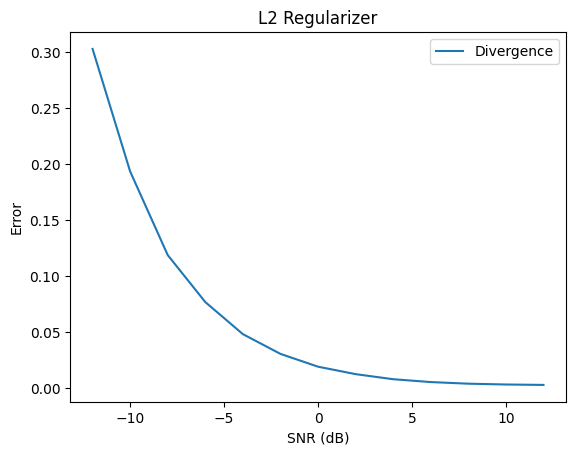

In [25]:
# plot error
plt.plot(snr_db, divergence_error_l2)
plt.xlabel("SNR (dB)")
plt.ylabel("Error")
plt.title("L2 Regularizer")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


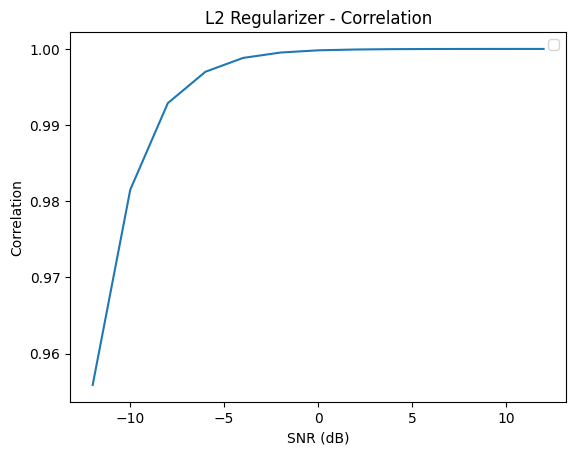

In [26]:
# plot correlation
plt.plot(snr_db, corr_l2)
plt.xlabel("SNR (dB)")
plt.ylabel("Correlation")
plt.title("L2 Regularizer - Correlation")
plt.legend()

#### L1 regularizer

In [27]:
num_realizations = 5
snr_db = np.arange(-12, 12.5, 2)
order = 0

trend_fil.denoising_l1_regularizer(flow=flow, 
        order = order,
        component="divergence",
        num_realizations=num_realizations, 
        snr_db=snr_db,
        regularization=0.5
        )

divergence_error_l1_order_0 = trend_fil.history["errors"]
corr_l1_order_0 = trend_fil.history["correlations"]

SNR: 0.0631 dB - l1 error: 0.2919 - corr: 0.9593
SNR: 0.1 dB - l1 error: 0.1845 - corr: 0.9831
SNR: 0.1585 dB - l1 error: 0.1161 - corr: 0.9932
SNR: 0.2512 dB - l1 error: 0.073 - corr: 0.9973
SNR: 0.3981 dB - l1 error: 0.0468 - corr: 0.9989
SNR: 0.631 dB - l1 error: 0.0299 - corr: 0.9995
SNR: 1.0 dB - l1 error: 0.0198 - corr: 0.9998
SNR: 1.5849 dB - l1 error: 0.0138 - corr: 0.9999
SNR: 2.5119 dB - l1 error: 0.0104 - corr: 0.9999
SNR: 3.9811 dB - l1 error: 0.0087 - corr: 1.0
SNR: 6.3096 dB - l1 error: 0.0079 - corr: 1.0
SNR: 10.0 dB - l1 error: 0.0052 - corr: 1.0
SNR: 15.8489 dB - l1 error: 0.0033 - corr: 1.0


In [28]:
# STF order = 1
order = 1

trend_fil.denoising_l1_regularizer(flow=flow, 
        order = order,
        component="divergence",
        num_realizations=num_realizations, 
        snr_db=snr_db,
        regularization=0.5
        )

divergence_error_l1_order_1 = trend_fil.history["errors"]
corr_l1_order_1 = trend_fil.history["correlations"]

SNR: 0.0631 dB - l1 error: 0.2909 - corr: 0.9598
SNR: 0.1 dB - l1 error: 0.1832 - corr: 0.9834
SNR: 0.1585 dB - l1 error: 0.1161 - corr: 0.9932
SNR: 0.2512 dB - l1 error: 0.0736 - corr: 0.9972
SNR: 0.3981 dB - l1 error: 0.0463 - corr: 0.9989
SNR: 0.631 dB - l1 error: 0.0297 - corr: 0.9995
SNR: 1.0 dB - l1 error: 0.0198 - corr: 0.9998
SNR: 1.5849 dB - l1 error: 0.0126 - corr: 0.9999
SNR: 2.5119 dB - l1 error: 0.0081 - corr: 1.0
SNR: 3.9811 dB - l1 error: 0.0053 - corr: 1.0
SNR: 6.3096 dB - l1 error: 0.0037 - corr: 1.0
SNR: 10.0 dB - l1 error: 0.0027 - corr: 1.0
SNR: 15.8489 dB - l1 error: 0.0022 - corr: 1.0


In [29]:
# STF order = 2
order = 2

trend_fil.denoising_l1_regularizer(flow=flow, 
        order = order,
        component="divergence",
        num_realizations=num_realizations, 
        snr_db=snr_db,
        regularization=0.5
        )

divergence_error_l1_order_2 = trend_fil.history["errors"]
corr_l2_order_2 = trend_fil.history["correlations"]

SNR: 0.0631 dB - l1 error: 0.2872 - corr: 0.9606
SNR: 0.1 dB - l1 error: 0.1843 - corr: 0.9831
SNR: 0.1585 dB - l1 error: 0.1154 - corr: 0.9933
SNR: 0.2512 dB - l1 error: 0.0734 - corr: 0.9973
SNR: 0.3981 dB - l1 error: 0.0471 - corr: 0.9989
SNR: 0.631 dB - l1 error: 0.0303 - corr: 0.9995
SNR: 1.0 dB - l1 error: 0.0198 - corr: 0.9998
SNR: 1.5849 dB - l1 error: 0.0135 - corr: 0.9999
SNR: 2.5119 dB - l1 error: 0.0104 - corr: 0.9999
SNR: 3.9811 dB - l1 error: 0.0086 - corr: 1.0
SNR: 6.3096 dB - l1 error: 0.0076 - corr: 1.0
SNR: 10.0 dB - l1 error: 0.0068 - corr: 1.0
SNR: 15.8489 dB - l1 error: 0.0062 - corr: 1.0


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 [Text(0, -0.05, '−0.05'),
  Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.10000000000000002, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25000000000000006, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35')])

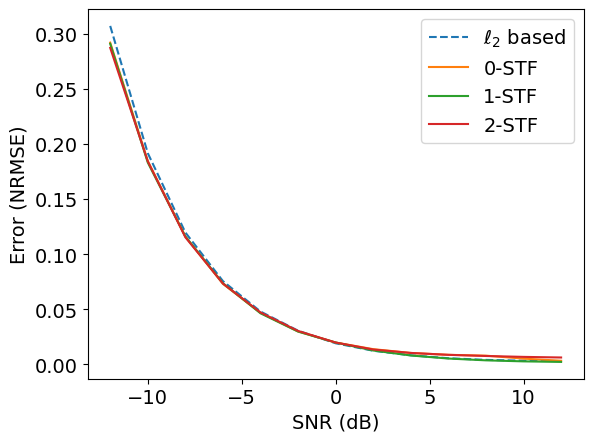

In [43]:
plt.plot(snr_db, divergence_error_l2, label="$\ell_2$ based", linestyle="--")

plt.plot(snr_db, divergence_error_l1_order_0, label="0-STF")
plt.plot(snr_db, divergence_error_l1_order_1, label="1-STF")
plt.plot(snr_db, divergence_error_l1_order_2, label="2-STF")
plt.legend(fontsize=14)

plt.xlabel("SNR (dB)", fontsize=14)
plt.ylabel("Error (NRMSE)", fontsize=14)

# increase x and y tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01]),
 [Text(0, 0.9500000000000001, '0.95'),
  Text(0, 0.9600000000000001, '0.96'),
  Text(0, 0.9700000000000001, '0.97'),
  Text(0, 0.9800000000000001, '0.98'),
  Text(0, 0.9900000000000001, '0.99'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.01, '1.01')])

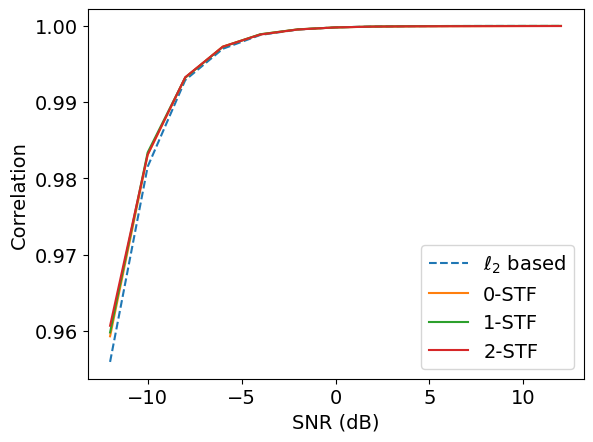

In [38]:
plt.plot(snr_db, corr_l2, label="$\ell_2$ based", linestyle="--")

plt.plot(snr_db, corr_l1_order_0, label="0-STF")
plt.plot(snr_db, corr_l1_order_1, label="1-STF")
plt.plot(snr_db, corr_l2_order_2, label="2-STF")
plt.legend(fontsize=14)

plt.xlabel("SNR (dB)", fontsize=14)
plt.ylabel("Correlation", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Interpolation

In [4]:
order = 0
ratio = np.arange(0.05, 1.05, 0.3)
num_realizations = 50

trend_fil.interpolation_l1_regularizer(
   flow=flow,
   order = order, 
   regularization = 0.5,
   component="divergence",
   ratio=ratio, 
   num_realizations=num_realizations
)

Ratio: 0.05 - error: 0.9549 - corr: 0.2814
Ratio: 0.35 - error: 0.6522 - corr: 0.7502
Ratio: 0.65 - error: 0.3355 - corr: 0.9381
Ratio: 0.95 - error: 0.0151 - corr: 0.9996
